### 1. Đọc dữ liệu và xử lý cơ bản

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('../Data/gld_price_data.csv')

# Chuyển cột Date thành định dạng datetime
data['Date'] = pd.to_datetime(data['Date'])

# Đặt cột Date làm index (tùy thuộc vào nhu cầu)
data.set_index('Date', inplace=True)

# Xem qua dữ liệu
print(data.head())

                    SPX        GLD        USO     SLV   EUR/USD
Date                                                           
2008-01-02  1447.160034  84.860001  78.470001  15.180  1.471692
2008-01-03  1447.160034  85.570000  78.370003  15.285  1.474491
2008-01-04  1411.630005  85.129997  77.309998  15.167  1.475492
2008-01-07  1416.180054  84.769997  75.500000  15.053  1.468299
2008-01-08  1390.189941  86.779999  76.059998  15.590  1.557099


### 2. Kiểm tra mối quan hệ phi tuyến tính (Mutual Information)
Giải thích: Mutual Information (MI) kiểm tra mức độ liên hệ giữa GLD và các cột khác, kể cả khi mối liên hệ đó không tuyến tính.

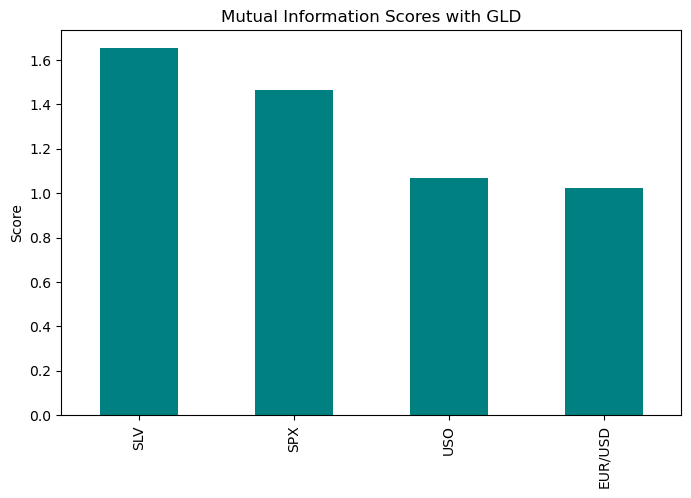

In [38]:
from sklearn.feature_selection import mutual_info_regression

# Chọn biến đầu vào và mục tiêu
X = data[['SPX', 'USO', 'SLV', 'EUR/USD']]
y = data['GLD']

# Tính Mutual Information
mi_scores = mutual_info_regression(X, y)

# Hiển thị kết quả
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores.sort_values(ascending=False, inplace=True)

# Vẽ biểu đồ Mutual Information
plt.figure(figsize=(8, 5))
mi_scores.plot(kind='bar', color='teal')
plt.title('Mutual Information Scores with GLD')
plt.ylabel('Score')
plt.show()

Giá trị MI cao cho biết biến có ảnh hưởng lớn đến GLD.

### 3. Vẽ biểu đồ GLD theo thời gian

<Figure size 2250x900 with 0 Axes>

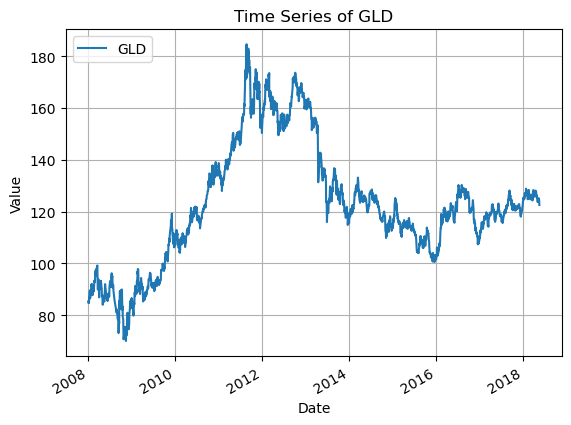

In [39]:
# Vẽ GLD cùng với SPX và EUR/USD
plt.figure(figsize=(15, 6), dpi=150)
data[['GLD']].plot()
plt.title('Time Series of GLD')
plt.ylabel('Value')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid()
plt.show()

### 4. Thống kê giá vàng trung bình, giá vàng tối đa và giá vàng tối thiểu theo năm

In [40]:
import pandas as pd

# Đọc dữ liệu từ file CSV
data = pd.read_csv('../Data/gld_price_data.csv')

# Chuyển cột Date thành định dạng datetime
data['Date'] = pd.to_datetime(data['Date'])

# Thêm cột "Year" từ cột Date
data['Year'] = data['Date'].dt.year

# Nhóm dữ liệu theo năm và tính toán thống kê
stats_by_year = data.groupby('Year')['GLD'].agg(['mean', 'median', 'max', 'min'])
print("Thống kê theo năm:")
print(stats_by_year)

Thống kê theo năm:
            mean      median         max         min
Year                                                
2008   86.111148   87.239998   99.169998   70.000000
2009   95.834464   93.074997  119.180000   79.790001
2010  119.966397  118.479999  139.110001  104.040001
2011  152.591486  150.375000  184.589996  127.930000
2012  162.151507  161.639999  173.610001  149.460007
2013  136.853213  132.449997  163.669998  114.820000
2014  121.721294  122.285000  133.100006  109.790001
2015  111.165561  111.860001  125.230003  100.500000
2016  118.780634  119.660004  130.270004  102.889999
2017  119.546101  119.715000  128.130005  110.470001
2018  126.017056  125.790001  128.830002  122.543800


### 5. Biều đồ giá vàng trung bình theo năm

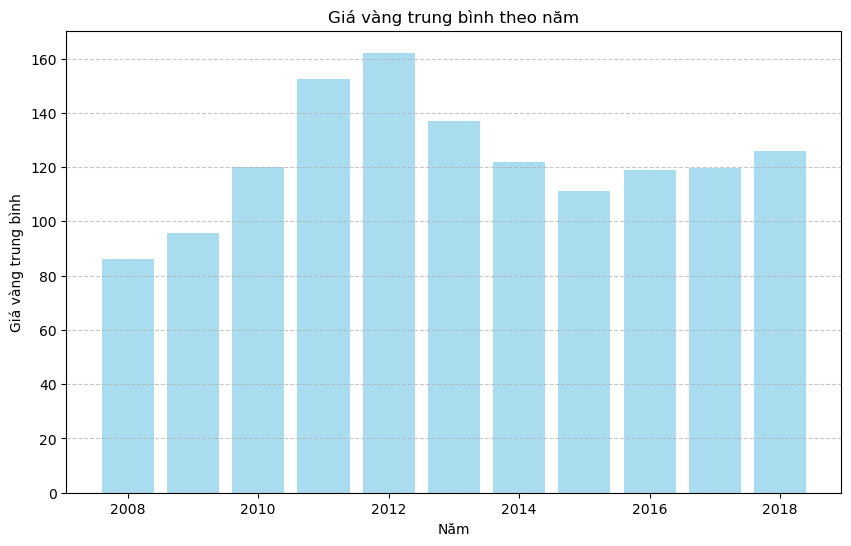

In [41]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ giá vàng trung bình qua các năm
plt.figure(figsize=(10, 6))
plt.bar(stats_by_year.index, stats_by_year['mean'], color='skyblue', alpha=0.7)
plt.title('Giá vàng trung bình theo năm')
plt.xlabel('Năm')
plt.ylabel('Giá vàng trung bình')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 6. Thống kê xu hướng giá vàng theo các ngày trong tuần

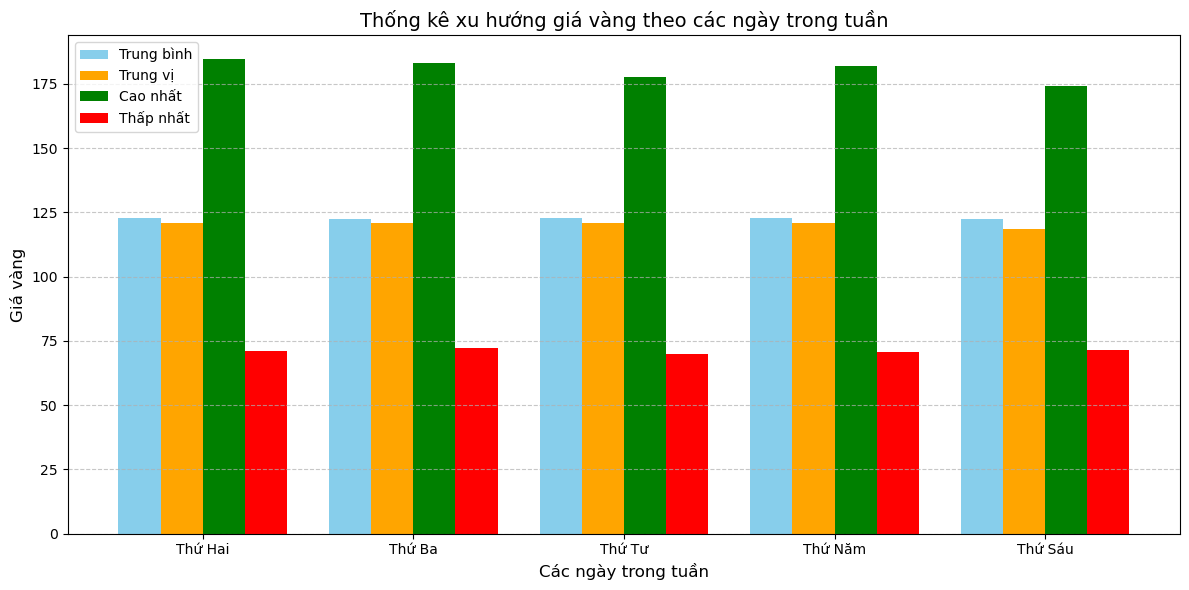

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc lại dữ liệu
data = pd.read_csv('../Data/gld_price_data.csv')  # Thay bằng đường dẫn file của bạn

# Chuyển cột 'Date' sang datetime và tạo cột 'Day_of_Week'
data['Date'] = pd.to_datetime(data['Date'])
data['Day_of_Week'] = data['Date'].dt.day_name()

# Tính các thống kê theo ngày trong tuần
stats_by_day = data.groupby('Day_of_Week')['GLD'].agg(['mean', 'median', 'max', 'min'])

# Đảm bảo thứ tự các ngày trong tuần
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
stats_by_day = stats_by_day.reindex(day_order)

# Việt hóa nhãn các ngày trong tuần
day_labels_vn = ['Thứ Hai', 'Thứ Ba', 'Thứ Tư', 'Thứ Năm', 'Thứ Sáu']

# Vẽ biểu đồ nhóm cột
x = np.arange(len(day_order))  # Vị trí của các ngày trong tuần
width = 0.2  # Độ rộng của mỗi nhóm cột

plt.figure(figsize=(12, 6))
plt.bar(x - width * 1.5, stats_by_day['mean'], width, label='Trung bình', color='skyblue')
plt.bar(x - width * 0.5, stats_by_day['median'], width, label='Trung vị', color='orange')
plt.bar(x + width * 0.5, stats_by_day['max'], width, label='Cao nhất', color='green')
plt.bar(x + width * 1.5, stats_by_day['min'], width, label='Thấp nhất', color='red')

# Gắn nhãn và thêm thông tin
plt.title('Thống kê xu hướng giá vàng theo các ngày trong tuần', fontsize=14)
plt.xlabel('Các ngày trong tuần', fontsize=12)
plt.ylabel('Giá vàng', fontsize=12)
plt.xticks(x, day_labels_vn)  # Sử dụng nhãn tiếng Việt
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 7. Thống kê so sánh giá vàng trong trong khảng thời gian khác nhau (boxplot)

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')


<Figure size 1200x800 with 0 Axes>

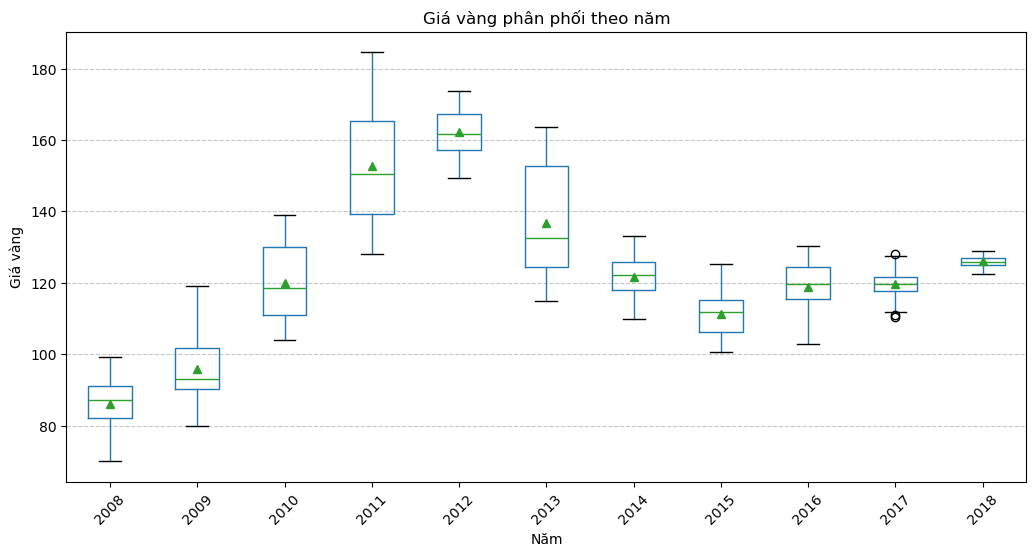

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Nếu chưa có, bạn có thể load lại file bằng pandas, ví dụ:
gld_price_data = pd.read_csv('../Data/gld_price_data.csv')

# Kiểm tra các cột trong dữ liệu để đảm bảo có cột 'Date'
print(gld_price_data.columns)

# Nếu cột 'Date' tồn tại, ta sẽ tạo thêm cột 'Year' từ cột 'Date'
gld_price_data['Year'] = pd.to_datetime(gld_price_data['Date']).dt.year

# Vẽ boxplot so sánh giá vàng theo năm
plt.figure(figsize=(12, 8))
gld_price_data.boxplot(column='GLD', by='Year', grid=False, figsize=(12, 6), showmeans=True)
plt.title('Giá vàng phân phối theo năm')
plt.suptitle('')  # Xóa tiêu đề mặc định của pandas boxplot
plt.xlabel('Năm')
plt.ylabel('Giá vàng')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

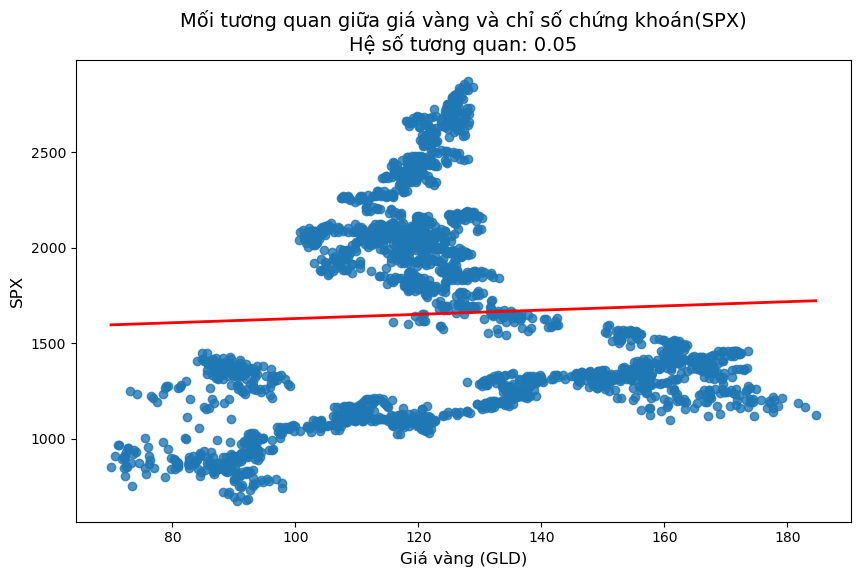

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tính hệ số tương quan giữa giá vàng (GLD) và SPX
correlation = gld_price_data['GLD'].corr(gld_price_data['SPX'])

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.regplot(x='GLD', y='SPX', data=gld_price_data, 
            line_kws={'color': 'red', 'lw': 2},
            ci=None)  # Không hiển thị khoảng tin cậy

# Thêm tiêu đề và nhãn trục
plt.title(f'Mối tương quan giữa giá vàng và chỉ số chứng khoán(SPX)\nHệ số tương quan: {correlation:.2f}', fontsize=14)
plt.xlabel('Giá vàng (GLD)', fontsize=12)
plt.ylabel('SPX', fontsize=12)

# Hiển thị biểu đồ
plt.show()

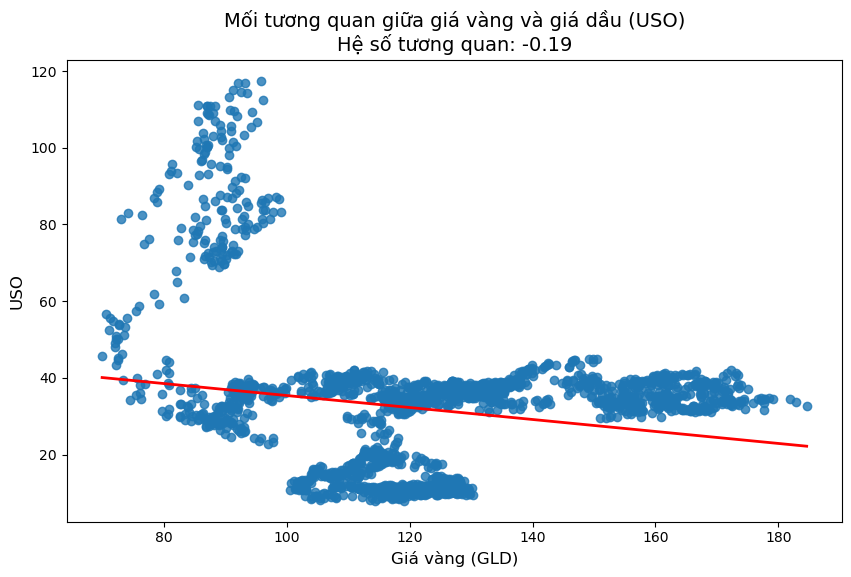

In [45]:
# Tính hệ số tương quan giữa giá vàng (GLD) và USO
correlation = gld_price_data['GLD'].corr(gld_price_data['USO'])

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.regplot(x='GLD', y='USO', data=gld_price_data, 
            line_kws={'color': 'red', 'lw': 2},
            ci=None)  # Không hiển thị khoảng tin cậy

# Thêm tiêu đề và nhãn trục
plt.title(f'Mối tương quan giữa giá vàng và giá dầu (USO)\nHệ số tương quan: {correlation:.2f}', fontsize=14)
plt.xlabel('Giá vàng (GLD)', fontsize=12)
plt.ylabel('USO', fontsize=12)

# Hiển thị biểu đồ
plt.show()

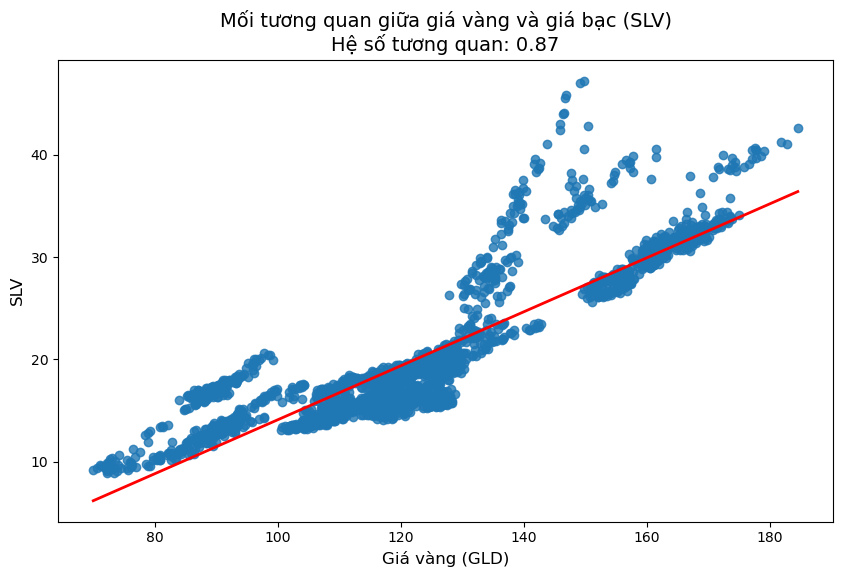

In [46]:
# Tính hệ số tương quan giữa giá vàng (GLD) và SLV
correlation = gld_price_data['GLD'].corr(gld_price_data['SLV'])

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.regplot(x='GLD', y='SLV', data=gld_price_data, 
            line_kws={'color': 'red', 'lw': 2},
            ci=None)  # Không hiển thị khoảng tin cậy

# Thêm tiêu đề và nhãn trục
plt.title(f'Mối tương quan giữa giá vàng và giá bạc (SLV)\nHệ số tương quan: {correlation:.2f}', fontsize=14)
plt.xlabel('Giá vàng (GLD)', fontsize=12)
plt.ylabel('SLV', fontsize=12)

# Hiển thị biểu đồ
plt.show()

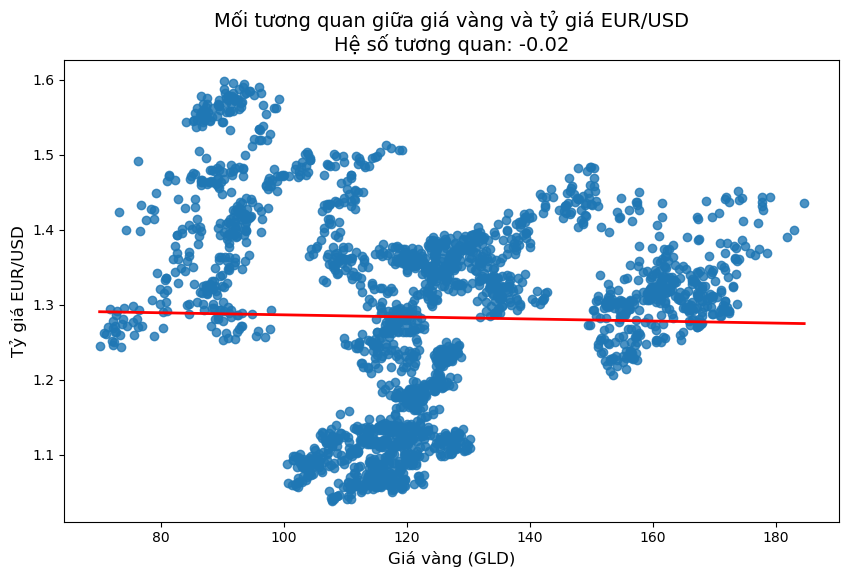

In [ ]:
# Tính hệ số tương quan giữa giá vàng (GLD) và tỷ giá EUR/USD
correlation = gld_price_data['GLD'].corr(gld_price_data['EUR/USD'])

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.regplot(x='GLD', y='EUR/USD', data=gld_price_data, 
            line_kws={'color': 'red', 'lw': 2},
            ci=None)  # Không hiển thị khoảng tin cậy

# Thêm tiêu đề và nhãn trục
plt.title(f'Mối tương quan giữa giá vàng và tỷ giá EUR/USD\nHệ số tương quan: {correlation:.2f}', fontsize=14)
plt.xlabel('Giá vàng (GLD)', fontsize=12)
plt.ylabel('Tỷ giá EUR/USD', fontsize=12)

# Hiển thị biểu đồ
plt.show()